In [1]:
import cv2
import matplotlib.pyplot as plt
import skimage
import itertools
import numpy as np
import os
import sklearn

In [2]:
from windows import *
from preprocessing import *

In [3]:
img = cv2.imread("train/000-000.jpg", 0)

In [18]:
windows = getWindows2(img=img, windowL=13)
windows.shape

(3022, 13, 13)

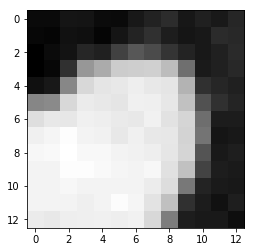

In [15]:
plt.imshow(windows[2222], 'gray')
plt.show()

In [21]:
windows, clusters, clusteredWindows = getClusteredWindows2(img=img, windowL=13, clustersNum=5)

In [22]:
windows.shape, clusters.shape, clusteredWindows.shape

((3022, 13, 13), (3022,), (5, 13, 13))

In [3]:
with open("forms.txt") as h:
    lines = h.readlines()[16:]

In [4]:
freq = np.zeros(680, dtype=int)
formWriter = {}
for i in lines:
    line = i.split(' ')
    key = line[1]
    if key in formWriter.keys():
        formWriter[key].append(line[0])
    else:
        formWriter[key] = [line[0]]

In [5]:
formWriter

{'000': ['a01-000u',
  'a01-003u',
  'a01-007u',
  'a01-011u',
  'a01-014u',
  'a01-020u',
  'a01-026u',
  'a01-030u',
  'a01-043u',
  'a01-049u',
  'a01-049x',
  'a01-053u',
  'a01-058u',
  'a01-063u',
  'a01-068u',
  'a01-072u',
  'a01-077u',
  'a01-082u',
  'a01-087u',
  'a01-091u',
  'a01-096u',
  'a01-102u',
  'a01-107u',
  'a01-113u',
  'a01-117u',
  'a01-122u',
  'a01-128u',
  'a01-132u',
  'a01-132x',
  'a03-050',
  'a03-071',
  'a03-073',
  'a03-080',
  'a03-089',
  'a05-000',
  'a05-013',
  'a05-017',
  'a05-022',
  'a05-025',
  'a05-029',
  'a05-039',
  'a05-044',
  'a05-048',
  'a05-053',
  'a05-058',
  'a05-062',
  'a05-069',
  'a05-073',
  'a05-080',
  'a05-084',
  'a05-089',
  'a05-094',
  'a05-099',
  'a05-104',
  'a05-108',
  'a05-113',
  'a05-116',
  'a05-121',
  'a05-125'],
 '001': ['a01-000x', 'a01-072x'],
 '002': ['a01-003'],
 '003': ['a01-003x', 'a01-007x'],
 '004': ['a01-007'],
 '005': ['a01-011', 'a01-030'],
 '006': ['a01-011x'],
 '007': ['a01-014', 'a01-038'],


In [6]:
def addtoTrain(filenames, writer):
    failed = []
    print("started writer #{}....".format(writer))
    for i in range(len(filenames)):
        imgfilename = os.path.join('forms', filenames[i])+'.png'
        img = cv2.imread(imgfilename, 0)
        cutImg = cutHandWriting(img)
        if cutImg is None:
            print(filenames[i], "failed...")
            failed.append(filenames[i])
            continue
        outputPath = os.path.join('train', writer+'-'+'{:03d}'.format(i)+'.jpg')
        cv2.imwrite(outputPath, cutImg)
        print(filenames[i], "done...")
    
    print("writer #{} done!....".format(writer))
    return failed

In [7]:
failed = []
for key, forms in formWriter.items():
    f = addtoTrain(forms, key)
    failed.append(f)

started writer #000....
a01-000u done...
a01-003u done...
a01-007u done...
a01-011u done...
a01-014u done...
a01-020u done...
a01-026u done...
a01-030u done...
a01-043u done...
a01-049u done...
a01-049x done...
a01-053u done...
a01-058u done...
a01-063u done...
a01-068u done...
a01-072u done...
a01-077u done...
a01-082u done...
a01-087u done...
a01-091u done...
a01-096u done...
a01-102u done...
a01-107u done...
a01-113u done...
a01-117u done...
a01-122u done...
a01-128u done...
a01-132u done...
a01-132x done...
a03-050 done...
a03-071 done...
a03-073 done...
a03-080 done...
a03-089 done...
a05-000 done...
a05-013 done...
a05-017 done...
a05-022 done...
a05-025 done...
a05-029 done...
a05-039 done...
a05-044 done...
a05-048 done...
a05-053 done...
a05-058 done...
a05-062 done...
a05-069 done...
a05-073 done...
a05-080 done...
a05-084 done...
a05-089 done...
a05-094 done...
a05-099 done...
a05-104 done...
a05-108 done...
a05-113 done...
a05-116 done...
a05-121 done...
a05-125 done...
wri

b02-102 done...
writer #098 done!....
started writer #099....
b02-105 done...
writer #099 done!....
started writer #100....
b03-025 done...
writer #100 done!....
started writer #102....
b03-087 done...
b03-092 done...
writer #102 done!....
started writer #103....
b03-098 done...
writer #103 done!....
started writer #104....
b03-104 done...
writer #104 done!....
started writer #105....
b03-109 done...
writer #105 done!....
started writer #106....
b03-114 done...
writer #106 done!....
started writer #107....
b04-000 done...
b04-004 done...
b04-010 done...
b04-020 done...
writer #107 done!....
started writer #108....
b04-026 done...
b04-034 done...
b04-040 done...
b04-047 done...
writer #108 done!....
started writer #109....
b04-054 done...
b04-060 done...
b04-066 done...
b04-075 done...
writer #109 done!....
started writer #110....
b04-081 done...
b04-089 done...
b04-096 done...
b04-103 done...
writer #110 done!....
started writer #111....
b04-107 done...
b04-116 done...
b04-121 done...


d04-047 done...
d04-053 done...
writer #188 done!....
started writer #189....
d04-050 done...
writer #189 done!....
started writer #190....
d04-058 done...
d04-062 done...
writer #190 done!....
started writer #191....
d04-066 done...
writer #191 done!....
started writer #192....
d04-071 done...
d04-075 done...
writer #192 done!....
started writer #193....
d04-081 done...
f04-093 done...
f04-096 done...
f04-100 done...
writer #193 done!....
started writer #194....
d04-086 done...
d04-089 done...
writer #194 done!....
started writer #195....
d04-096 done...
d04-101 done...
writer #195 done!....
started writer #196....
d04-111 done...
writer #196 done!....
started writer #197....
d04-117 done...
d04-121 done...
writer #197 done!....
started writer #198....
d04-125 done...
d04-131 done...
writer #198 done!....
started writer #199....
d05-008 done...
d05-021 done...
d05-025 done...
d05-030 done...
writer #199 done!....
started writer #200....
d05-013 done...
writer #200 done!....
started wr

f07-039b done...
f07-042b done...
writer #289 done!....
started writer #290....
f07-046b done...
writer #290 done!....
started writer #291....
f07-069 done...
f07-073 done...
f07-081b done...
f07-084b done...
writer #291 done!....
started writer #292....
f07-076a done...
f07-081a done...
f07-084a done...
f07-088a done...
f07-092a done...
writer #292 done!....
started writer #293....
f07-096 done...
f07-088b done...
f07-092b done...
f07-101b done...
g07-000b done...
writer #293 done!....
started writer #294....
f07-101a done...
g07-000a done...
g07-003a done...
g07-007a done...
writer #294 done!....
started writer #295....
g01-004 done...
g01-008 done...
writer #295 done!....
started writer #296....
g01-012 done...
g01-016 done...
g01-019 done...
writer #296 done!....
started writer #297....
g01-022 done...
g01-025 done...
g01-027 done...
writer #297 done!....
started writer #298....
g01-031 done...
g01-034 done...
g01-037 done...
writer #298 done!....
started writer #299....
g01-039 do

h02-022 done...
writer #367 done!....
started writer #368....
h02-024 done...
writer #368 done!....
started writer #369....
h02-028 done...
writer #369 done!....
started writer #370....
h02-035 done...
writer #370 done!....
started writer #371....
h02-037 done...
writer #371 done!....
started writer #372....
h02-040 done...
writer #372 done!....
started writer #373....
h02-043 done...
writer #373 done!....
started writer #375....
h02-049 done...
writer #375 done!....
started writer #376....
h04-028 done...
writer #376 done!....
started writer #377....
h04-035 done...
writer #377 done!....
started writer #378....
h04-049 done...
writer #378 done!....
started writer #379....
h04-052 done...
h04-055 done...
writer #379 done!....
started writer #380....
h04-057 done...
h04-061 done...
writer #380 done!....
started writer #382....
h04-071 done...
h04-074 done...
writer #382 done!....
started writer #383....
h04-078 done...
h04-082 done...
writer #383 done!....
started writer #384....
h06-07

l04-020 done...
l04-026 done...
writer #481 done!....
started writer #482....
l04-034 done...
l04-043 done...
writer #482 done!....
started writer #483....
l04-052 done...
l04-062 done...
writer #483 done!....
started writer #484....
l04-066 done...
l04-071 done...
writer #484 done!....
started writer #485....
l04-082 done...
writer #485 done!....
started writer #486....
l04-087 done...
l04-093 done...
writer #486 done!....
started writer #487....
l04-098 done...
l04-102 done...
writer #487 done!....
started writer #488....
l04-106 done...
l04-113 done...
writer #488 done!....
started writer #489....
l04-118 done...
l04-124 done...
writer #489 done!....
started writer #490....
l04-130 done...
l04-136 done...
writer #490 done!....
started writer #491....
l04-141 done...
l04-147 done...
writer #491 done!....
started writer #492....
l04-153 done...
l04-159 done...
writer #492 done!....
started writer #493....
l04-163 done...
l04-170 done...
writer #493 done!....
started writer #494....
l0

n04-202 done...
n04-209 done...
n04-213 done...
n04-218 done...
writer #587 done!....
started writer #588....
n06-074 done...
n06-082 done...
n06-092 done...
n06-100 done...
n06-111 done...
n06-119 done...
n06-123 done...
n06-128 done...
n06-133 done...
n06-140 done...
writer #588 done!....
started writer #589....
p01-147 done...
writer #589 done!....
started writer #590....
p01-155 done...
writer #590 done!....
started writer #591....
p01-168 done...
writer #591 done!....
started writer #592....
p01-174 done...
writer #592 done!....
started writer #593....
p02-000 done...
writer #593 done!....
started writer #594....
p02-008 done...
writer #594 done!....
started writer #595....
p02-017 done...
writer #595 done!....
started writer #596....
p02-022 done...
writer #596 done!....
started writer #597....
p02-027 done...
writer #597 done!....
started writer #598....
p02-069 done...
p02-090 done...
writer #598 done!....
started writer #599....
p02-076 done...
p02-081 done...
writer #599 done